# Parcial 2

Juan Pablo Ortiz Gil c.c. 1010128030

## 1. Pandas

### 1.1

En primer lugar se ingresan manualmente los diccionarios del archivo datos_join.txt

In [1]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

Ahora se crean 3 DF con los diccionarios, asignandolos a variables, tras esto se visualizan

In [2]:
import pandas as pd

df_data_1 = pd.DataFrame(data_1)
df_data_2 = pd.DataFrame(data_2)
df_data_3 = pd.DataFrame(data_3)

In [3]:
df_data_1

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles

In [4]:
df_data_2

id primer_nombre  apellido
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [5]:
df_data_3

id  test_id
0   1       51
1   2       15
2   3       15
3   4       61
4   5       16
5   7       14
6   8       15
7   9        1
8  10       61
9  11       16

Se unen los dos primeros DF a lo largo de sus filas y columnas, asignando todos los datos, el resultado se muestra a continuación.

In [6]:
pd.concat([df_data_1, df_data_2], axis=0, ignore_index=True)

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
5  4          Luis      Ruiz
6  5         Brian   Giralgo
7  6       Mariana   Ortegon
8  7       Marcela  Palacios
9  8        Carlos   Gallego

In [7]:
pd.merge(df_data_1, df_data_2, on='id', how='outer')

id primer_nombre_x apellido_x primer_nombre_y apellido_y
0  1            Alex   Anderson             NaN        NaN
1  2             Amy     Ruales             NaN        NaN
2  3       Valentina      Marin             NaN        NaN
3  4           Alice    Barbosa            Luis       Ruiz
4  5            Lina     Robles           Brian    Giralgo
5  6             NaN        NaN         Mariana    Ortegon
6  7             NaN        NaN         Marcela   Palacios
7  8             NaN        NaN          Carlos    Gallego

Se hace un merfe de todos los DF

In [8]:
pd.merge(df_data_1, df_data_2, on='id', how='outer').merge(df_data_3, on='id', how='left')

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  1            Alex   Anderson             NaN        NaN     51.0
1  2             Amy     Ruales             NaN        NaN     15.0
2  3       Valentina      Marin             NaN        NaN     15.0
3  4           Alice    Barbosa            Luis       Ruiz     61.0
4  5            Lina     Robles           Brian    Giralgo     16.0
5  6             NaN        NaN         Mariana    Ortegon      NaN
6  7             NaN        NaN         Marcela   Palacios     14.0
7  8             NaN        NaN          Carlos    Gallego     15.0

Se muestran los datos que comparten "id"

In [9]:
pd.merge(df_data_1, df_data_2, on='id', how='inner').merge(df_data_3, on='id', how='left')

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  4           Alice    Barbosa            Luis       Ruiz       61
1  5            Lina     Robles           Brian    Giralgo       16

### 1.2

En primer lugar se importan y visulizan los datos

In [10]:
alcohol = pd.read_csv("data/datos_alcohol.txt")

alcohol.head()

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0  Afghanistan                  0                0               0   
1      Albania                 89              132              54   
2      Algeria                 25                0              14   
3      Andorra                245              138             312   
4       Angola                217               57              45   

   litros_totales_de_alcohol_puro continente  
0                             0.0         AS  
1                             4.9         EU  
2                             0.7         AF  
3                            12.4         EU  
4                             5.9         AF

Ahora se utiliza groupby para identificar el continente con mayor consumo de cerveza en promedio

In [11]:
a = alcohol.groupby(['continente']).mean()['porciones_cerveza'].idxmax()

In [12]:
print(f'El continente que más consume cerveza en promedio es {a}')

El continente que más consume cerveza en promedio es EU


Se imprime un análisis básico estadístico del consumo de vino a nivel mundial, donde se observa el promedo, la desviación estandar, el conusmo mínimo y el máximo

In [13]:
alcohol['porciones_vino'].describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64

Para cada continente se imprimen los valores medio, mínimo y máximo (en este orden) para el consumo de licor

In [14]:
alcohol.groupby(['continente']).mean()['porciones_licor']

continente
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
SA    114.750000
Name: porciones_licor, dtype: float64

In [15]:
alcohol.groupby(['continente']).min()['porciones_licor']

continente
AF     0
AS     0
EU     0
OC     0
SA    25
Name: porciones_licor, dtype: int64

In [16]:
alcohol.groupby(['continente']).max()['porciones_licor']

continente
AF    152
AS    326
EU    373
OC    254
SA    302
Name: porciones_licor, dtype: int64

Se imprime el consmo medio de alcohol por contiente

In [17]:
alcohol.groupby(['continente']).mean()

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

### 1.3

En primer lugar se importan y visulizan los datos

In [18]:
visual = pd.read_csv("data/visulualizacion.txt",index_col='Unnamed: 0')

visual.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Primero se crea un histograma para la columna "total_bill"

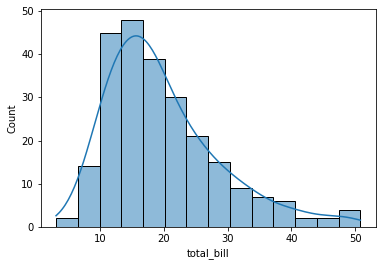

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = visual, x = 'total_bill',kde=True)
plt.show()

Luego se crea un scatter plot para visualizar la relación entre total_bill y tip

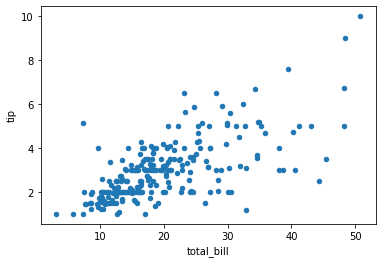

In [20]:
visual.plot(kind='scatter',x='total_bill', y='tip')
plt.show()

Ahora se crea un lineplot para presentar la relación entre los valores de days y total_bill

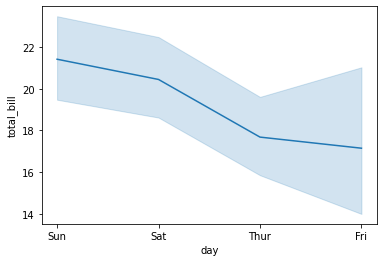

In [21]:
sns.lineplot(data=visual, x='day', y = 'total_bill', legend = True)
plt.show()

Finalmente se crea un bocplot para presentar el total:bill por día, y por momento del día

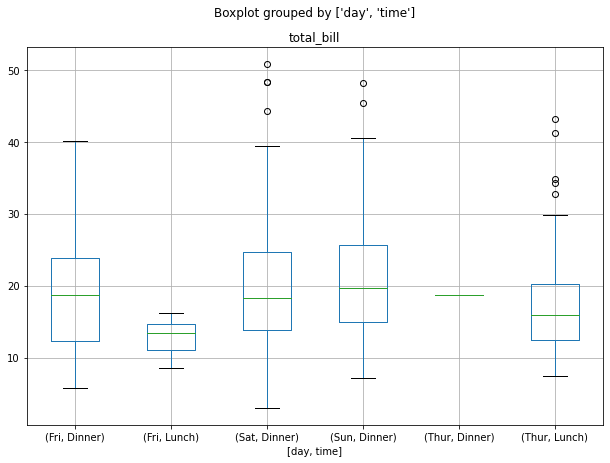

In [22]:
visual.boxplot('total_bill',by=['day','time'],figsize=(10,7))
plt.show()